In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
wh_data=pd.read_csv("/content/HeightWeight.csv")

In [5]:
wh_data.head(4)

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139


Performing EDA On The Data

In [6]:
wh_data.isnull().sum()

,0
Age,0
Height,0


In [7]:
wh_data.duplicated().sum()

np.int64(0)

In [8]:
wh_data.dtypes

,0
Age,int64
Height,int64


In [9]:
wh_data.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


Relationship between the input and output column

In [10]:
x_col=wh_data.iloc[:,0]

In [11]:
y_col=wh_data.iloc[:,-1]

In [12]:
x_col.sample(2)

,Age
24,34
63,73


In [13]:
y_col.sample(2)

,Height
36,156
32,151


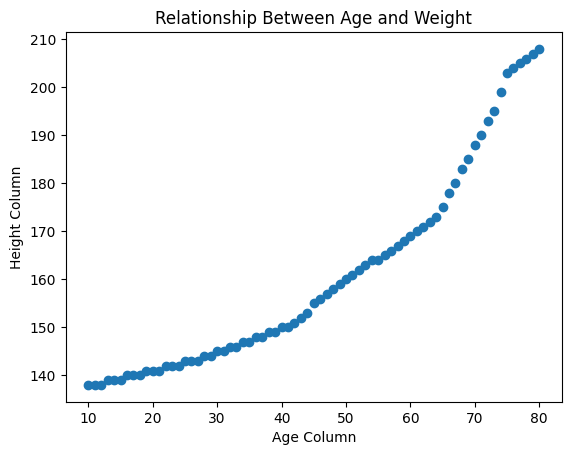

In [14]:
plt.scatter(x_col,y_col)
plt.xlabel("Age Column")
plt.ylabel("Height Column")
plt.title("Relationship Between Age and Weight")
plt.show()

<h1>The relationship between the Age and Height column is not linear</h1>

# Model Development Process Starts Here

In [15]:
wh_data.sample(3)

,Age,Height
58,68,183
27,37,148
35,45,155


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=wh_data.iloc[:,0]
y=wh_data.iloc[:,-1]

In [18]:
print("Input column data \n")
print(X.head())
print("\n\n")
print("Output column Data \n")
print(y.head())

Input column data 

0    10
1    11
2    12
3    13
4    14
Name: Age, dtype: int64



Output column Data 

0    138
1    138
2    138
3    139
4    139
Name: Height, dtype: int64


In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# x_train checking

print("Samples of the training data")
print(x_train.sample(5))

print("Total Data Count")
print(len(x_train))

print("Percentage of the train data")
print(round((len(x_train)/len(wh_data))*100,2))

Samples of the training data
43    53
42    52
44    54
13    23
50    60
Name: Age, dtype: int64
Total Data Count
56
Percentage of the train data
78.87


In [21]:
# x_test checking

print("Samples of the test data")
print(x_test.sample(5))

print("Total test Data Count")
print(len(x_test))

print("Percentage of the test data")
print(round((len(x_test)/len(wh_data))*100,2))

Samples of the test data
46    56
55    65
5     15
9     19
61    71
Name: Age, dtype: int64
Total test Data Count
15
Percentage of the test data
21.13


In [22]:
# y_train checking

print("Samples of y_train data")
print(y_train.sample(3))

print("Count of y_train data")
print(len(y_train))

print("Percentage of the y_train data")
print((len(y_train)/len(wh_data))*100)

Samples of y_train data
29    149
54    173
3     139
Name: Height, dtype: int64
Count of y_train data
56
Percentage of the y_train data
78.87323943661971


In [23]:
# y_test checking

print("Samples of y_test data")
print(y_test.sample(3))

print("Count of y_test data")
print(len(y_test))

print("Percentage of the y_test data")
print((len(y_test)/len(wh_data))*100)

Samples of y_test data
10    141
18    144
12    142
Name: Height, dtype: int64
Count of y_test data
15
Percentage of the y_test data
21.12676056338028


## Simple Linear regression model development without doing feature engineering

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
LR_model1=LinearRegression()

In [26]:
LR_model1.fit(x_train.to_frame(),y_train)

LinearRegression()

In [27]:
y_pred=LR_model1.predict(x_test.to_frame())

In [28]:
y_pred

array([147.5528074 , 125.23926742, 174.93760647, 129.29627469,
       181.02311737, 143.49580013, 135.38178559, 158.70957739,
       171.89485102, 137.41028923, 156.68107376, 134.36753377,
       187.10862828, 130.3105265 , 178.99461374])

In [29]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error

In [30]:
print(round(r2_score(y_test,y_pred),2))
print(round(mean_squared_error(y_test,y_pred),2))
print(round(root_mean_squared_error(y_test,y_pred),2))

0.81
47.38
6.88


In [31]:
y_test.head()

,Height
22,146
0,138
49,168
4,139
55,175


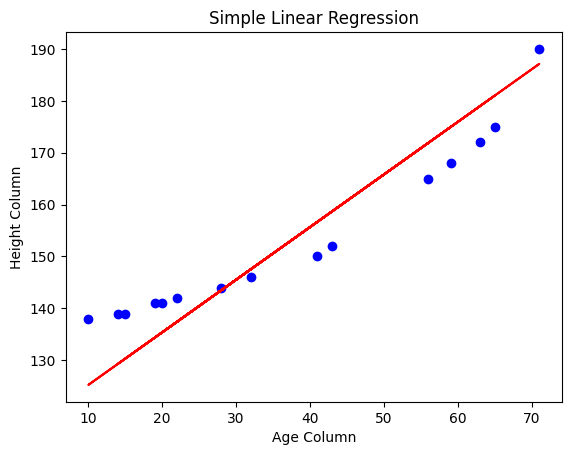

In [32]:
plt.scatter(x_test,y_test,label="Actual Data", color="blue")
plt.plot(x_test,y_pred,color="red", label="Regression Line")
plt.xlabel("Age Column")
plt.ylabel("Height Column")
plt.title("Simple Linear Regression")
plt.show()

# Model development with feature engineering

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()
x_train_scalled=sc.fit_transform(x_train.to_frame())

In [42]:
x_test_scalled=sc.transform(x_test.to_frame())

In [45]:
LR_model2=LinearRegression()

In [46]:
LR_model2.fit(x_train_scalled,y_train)

LinearRegression()

In [ ]:
y_pred=L

# Polynomial model creation

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
pl_features=PolynomialFeatures(degree=2)

In [130]:
x_train_poly=pl_features.fit_transform(x_train.to_frame())
x_train_poly[:5]

array([[1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 6.900e+01, 4.761e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 6.800e+01, 4.624e+03],
       [1.000e+00, 5.200e+01, 2.704e+03]])

In [131]:
x_test_poly=pl_features.transform(x_test.to_frame())
x_test_poly[:5]

array([[1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 5.900e+01, 3.481e+03],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 6.500e+01, 4.225e+03]])

In [132]:
LR_model2=LinearRegression()

In [133]:
LR_model2.fit(x_train_poly,y_train)

LinearRegression()

In [134]:
y_pred=LR_model2.predict(x_test_poly)

In [135]:
y_pred

array([144.30959668, 141.18194983, 170.73367808, 140.52146428,
       179.98585484, 142.51178501, 140.55502647, 152.07037769,
       166.56852042, 140.83935801, 150.35203944, 140.46407523,
       190.46718022, 140.44170044, 176.76522385])

In [136]:
print(round(r2_score(y_test,y_pred),2))
print(round(mean_squared_error(y_test,y_pred),2))
print(round(root_mean_squared_error(y_test,y_pred),2))

0.98
5.28
2.3


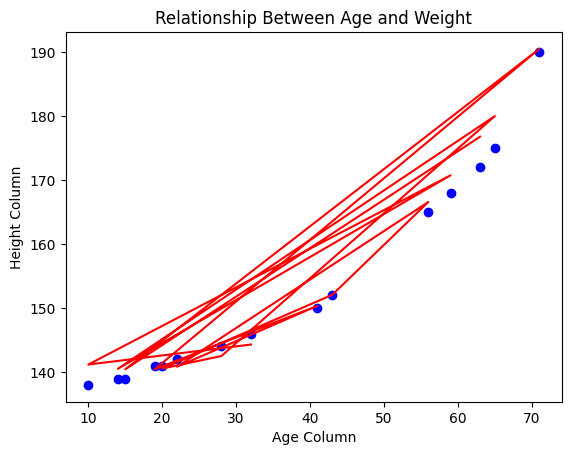

In [137]:
plt.scatter(x_test,y_test,label="Actual Data", color="blue")
plt.plot(x_test,y_pred,color="red", label="Regression Line")
plt.xlabel("Age Column")
plt.ylabel("Height Column")
plt.title("Relationship Between Age and Weight")
plt.show()

# After polynomial regression my model is getted overfit so it fails

# Making the joblib and pickle file

In [138]:
import joblib
import pickle

In [139]:
joblib.dump(LR_model1,"LR_model1.joblib")

['LR_model1.joblib']

In [140]:
pickle.dump(LR_model1,open("LR_model1.pkl","wb"))